In [105]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'2.6.0+cu124'

In [106]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [107]:
len(X), len(y)

(50, 50)

In [108]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [109]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

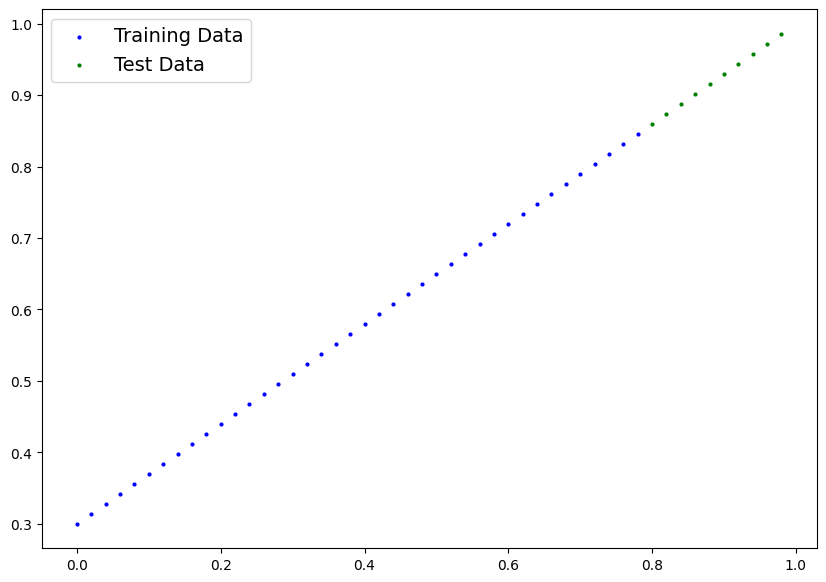

In [110]:
plot_predictions()

In [111]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()  # So that we can use the superclass: nn.Module
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # forward is a required function when using a custom nn.Module
  def forward(self,  x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [112]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [113]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [114]:
# inference mode turns of gradient tracking (faster predictions during inference)
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

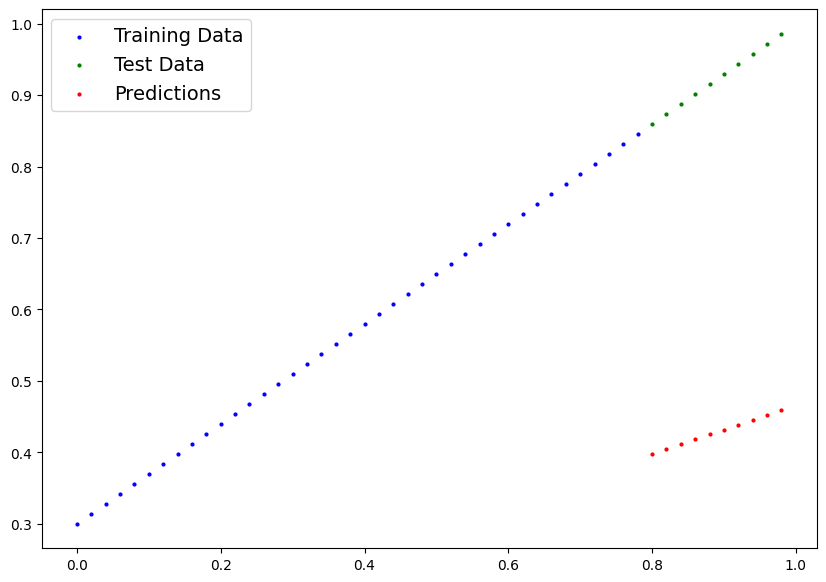

In [115]:
plot_predictions(predictions=y_preds)

In [116]:
# Loss function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [117]:
model_0.parameters()

<generator object Module.parameters at 0x7d333a2126c0>

# Training Loop
0. Loop through the data
1. Forward Pass (involves data moving through our model's forward function)
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the params of our model wrt to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's params to try and improve the loss (**gradient descent**)

In [118]:
epochs = 200

# For tracking different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch set all params that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad() # Clear the previous gradients accumulated by PyTorch, to prevent gradients from previous steps mixing in and messing up training.

  # 4. Perform backpropagation on the loss wrt to the params of the model
  loss.backward() # Computes gradients using autograd and stores it in the attribute .grad of each param

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # Uses the gradients in .grad of every learnable param to update each parameter.

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing
  with torch.inference_mode(): # turns off gradient tracking & a few more behind the scenes stuff
    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate test loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss.item()) # use .item() as loss contains .grad
    test_loss_values.append(test_loss) # no need .item() as test_loss do not contain .grad during eval
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    # Print model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

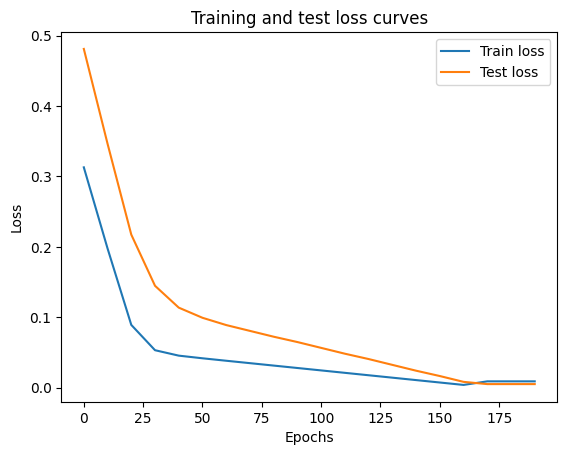

In [119]:
# Plot loss curves
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [120]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

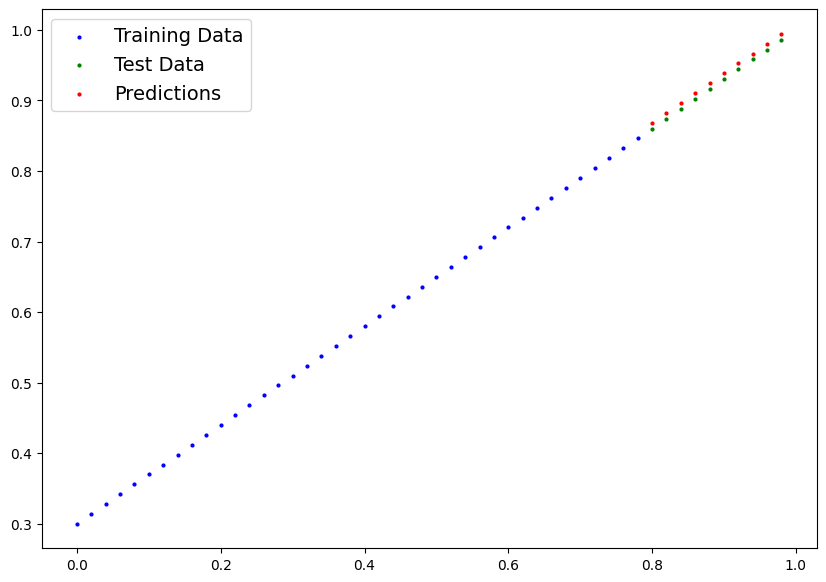

In [121]:
plot_predictions(predictions=y_preds_new)

# Saving a model in PyTorch

3 Main Methods
1. torch.save() - save PyTorch object in Python's pickle format
2. torch.load() - load a saved PyTorch object
3. torch.nn.Module.load_state_dict() - this allows you to load a model's saved state dictionary

Note: A model saved to the default file system (like with torch.save(...)), will disappear after:

1. Session disconnect
2. Timeout
3. Runtime reset
4. Closing the tab for too long

In [122]:
# literally a dictionary that holds the state of the model
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [123]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'fused': None,
   'params': [0, 1]}]}

In [124]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models") # Creates a Path object representing a directory called "models"
MODEL_PATH.mkdir(parents=True, exist_ok=True) # parents=True: create any missing parent directories automatically

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [125]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 which updates the new instance with the updated params
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Put the loaded model into evaluation mode
loaded_model_0.eval()

LinearRegressionModel()

In [126]:
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [127]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [128]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])